## Customer Lifetime Value Project

### 1- Giriş

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #data visualization library
import missingno as msno #visualize the distribution of NaN values --> pip install missingno
import datetime as dt
from PIL import Image
import xlrd #xlrd is a library for reading data and formatting information from Excel files in the historical .xls format
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows',None) #adjust rows and columns numbers
pd.set_option('display.max_columns',None)

from warnings import filterwarnings
filterwarnings('ignore')

from IPython.core.display import HTML

In [2]:
# Datamızın okunması
data = pd.read_excel("C:/Users/marketahmet/Desktop/datascience/cltv/data/MarketSales.xlsx")

In [3]:
# Verimizin bir adet kopyasını oluşturuyorum kullanmak için
df = data.copy()

In [4]:
df.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,BRANCH,SALESMAN,CITY,REGION,LATITUDE,LONGITUDE,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,Kocaeli Subesi,Eyüp CİNE,Kocaeli,Marmara,40.8533,29.8815,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,Antalya Subesi,İlhan ÖRENLİ,Antalya,Akdeniz,36.8841,30.7056,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,İstanbul Subesi,İsmet SARTIK,İstanbul,Marmara,41.0053,28.9770,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,İstanbul Subesi,İsmet SARTIK,İstanbul,Marmara,41.0053,28.9770,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,İzmir Subesi,Gülten IŞLAK,İzmir,Ege,38.4189,27.1287,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [5]:
# İlgili değişkenleri seçilmesi
df1 = df[["CLIENTCODE", "DATE_","FICHENO","AMOUNT","PRICE","LINENETTOTAL"]]
df1.isnull().sum() #return the number of missing values

CLIENTCODE      18348
DATE_               1
FICHENO             0
AMOUNT              1
PRICE               1
LINENETTOTAL        1
dtype: int64

In [6]:
df2 = df1.dropna() #remove missing values
df2.head()

,CLIENTCODE,DATE_,FICHENO,AMOUNT,PRICE,LINENETTOTAL
0,467369,2017-01-07,18456,1.0,2.00,2.00
1,131464,2017-01-06,18105,5.0,2.65,13.25
2,656969,2017-01-03,18350,1.0,0.40,0.40
3,656969,2017-01-03,18350,1.0,0.40,0.40
4,447336,2017-01-05,18005,1.0,0.40,0.40


In [7]:
df2.isnull().sum()

CLIENTCODE      0
DATE_           0
FICHENO         0
AMOUNT          0
PRICE           0
LINENETTOTAL    0
dtype: int64

In [8]:
def data_understanding(data):
    print("DATA INFORMATION","\n\n")
    print("Shape:", data.shape )
    float_cols=[col for col in data.columns if data[col].dtype=="float64"]
    obj_cols=[col for col in data.columns if data[col].dtype=="O"]
    int_cols=[col for col in data.columns if data[col].dtype=="int64"]
    date_cols=[col for col in data.columns if col not in obj_cols and col not in float_cols and col not in int_cols ]
    print("\n\n","DATA COLUMNS","\n\n")
    print("Float columns:", float_cols)
    print("\n","Object columns:", obj_cols)
    print("\n","Integer columns:", int_cols)
    print("\n","Datetime columns:", date_cols)
    display(HTML(data.to_html(max_rows=1)))
    print("NULL VALUES")
    print("Total number of rows which have null data: ", data.shape[0]-data.dropna().shape[0])
    print( "Percentage of null data", "%.3f" % ((data.shape[0]-data.dropna().shape[0])/data.shape[0]))
    msno.bar(data)
    msno.heatmap(data)
    plt.show()
    print( "CORRELATION")
    plt.figure(figsize=(14,12))
    sns.heatmap(data.corr(), annot=True, cmap="BuPu");

DATA INFORMATION 


Shape: (611108, 26)


 DATA COLUMNS 


Float columns: ['ID', 'ITEMCODE', 'AMOUNT', 'PRICE', 'LINENETTOTAL', 'LINENET', 'BRANCHNR', 'LATITUDE', 'LONGITUDE']

 Object columns: ['ITEMNAME', 'BRANCH', 'SALESMAN', 'CITY', 'REGION', 'CLIENTCODE', 'CLIENTNAME', 'BRANDCODE', 'BRAND', 'CATEGORY_NAME1', 'CATEGORY_NAME2', 'CATEGORY_NAME3', 'GENDER']

 Integer columns: ['FICHENO']

 Datetime columns: ['DATE_', 'STARTDATE', 'ENDDATE']


,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,BRANCH,SALESMAN,CITY,REGION,LATITUDE,LONGITUDE,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.0,2.0,1.85,52.0,Kocaeli Subesi,Eyüp CİNE,Kocaeli,Marmara,40.8533,29.8815,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E


NULL VALUES
Total number of rows which have null data:  245219
Percentage of null data 0.401


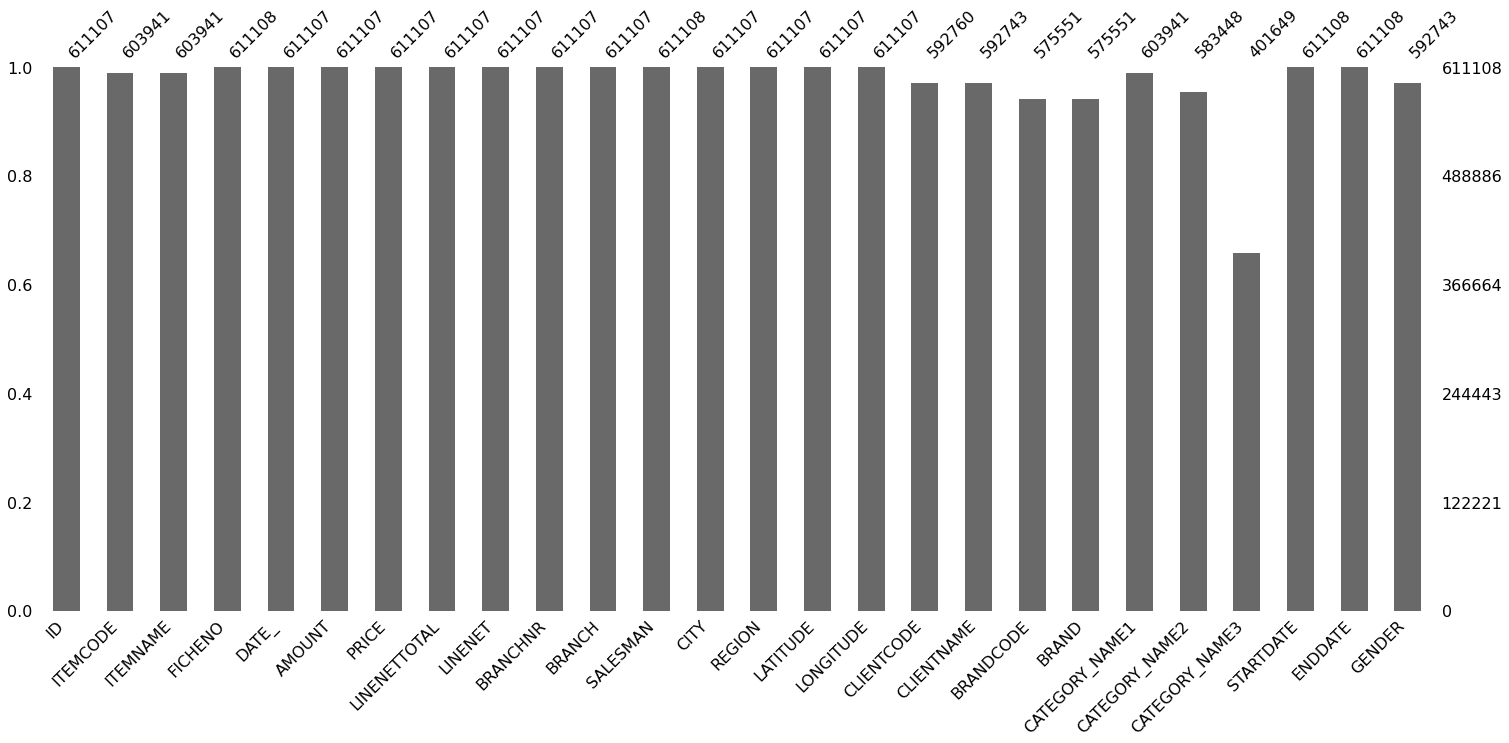

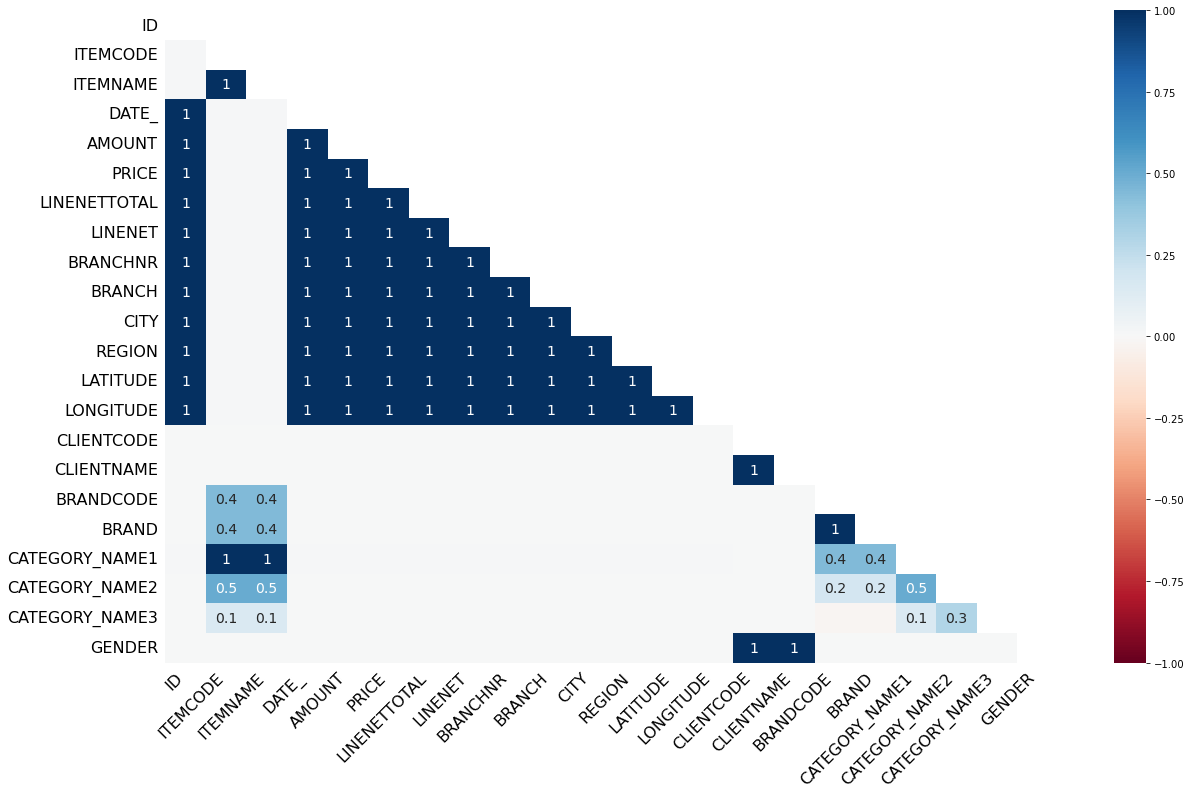

CORRELATION


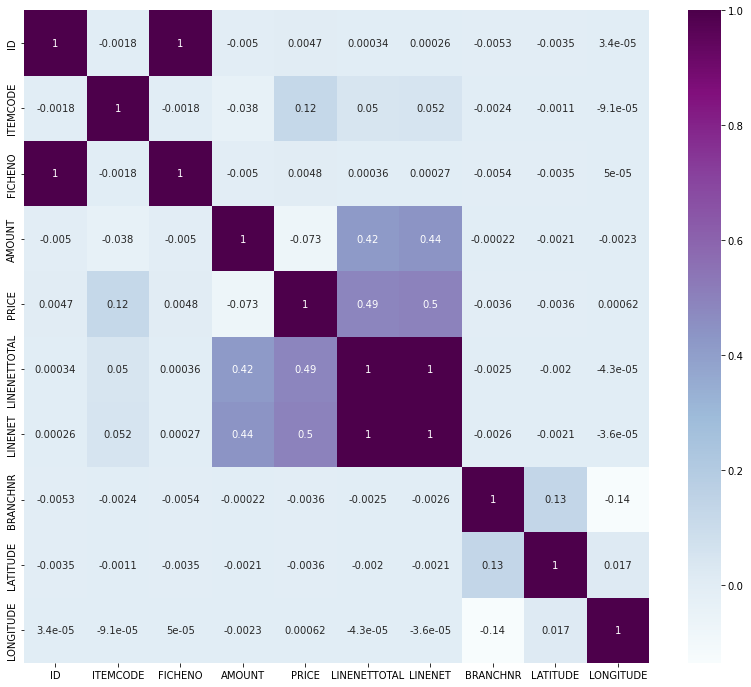

In [9]:
data_understanding(df)

### 2- Veri seti hazırlığı

In [10]:
df3 = df2.groupby("CLIENTCODE").agg({"DATE_": lambda date : (date.max() - date.min()).days, #ilk ve son alışveriş arasında geçen süre
                               "FICHENO" : lambda num : len(num),   #işlme sayısı                        
                               "AMOUNT" : lambda quant : quant.sum(),     #kaç ürün aldığı
                               "LINENETTOTAL" : lambda price : price.sum()    #ne kadar para harcadı
                              })
df3.head(15)

,DATE_,FICHENO,AMOUNT,LINENETTOTAL
CLIENTCODE,,,,
1,31,25,26.438,115.59
10,56,2,2.000,4.25
100,3,8,25.759,297.83
1000,15,6,7.320,31.29
1000035,0,2,2.000,16.00
1000078,0,8,9.000,50.75
1000105,37,5,8.597,31.33
1000117,55,14,12.615,88.84
1000120,45,5,7.000,24.27


### 3- Metrik Hesapları

In [11]:
#AVG ORDER VALUE HESABI   ---> Avg Order Value = Total Revenue / Total of Order

df3["avg_order_value"]=df3["LINENETTOTAL"]/df3["FICHENO"]
df3.head()

,DATE_,FICHENO,AMOUNT,LINENETTOTAL,avg_order_value
CLIENTCODE,,,,,
1,31,25,26.438,115.59,4.62360
10,56,2,2.000,4.25,2.12500
100,3,8,25.759,297.83,37.22875
1000,15,6,7.320,31.29,5.21500
1000035,0,2,2.000,16.00,8.00000


In [14]:
# PURCHASE FREQ ---> TOTAL OF ORDERS / TOTAL OF CUSTOMERS --- kişinin yaptığı işlem sayısı / tüm işlemler

purchase_frequency = sum(df3["FICHENO"])/df3.shape[0]
purchase_frequency

12.019628518127991

In [17]:
# CHURN RATE --->  müşteri alışveriş yaptıktan sonra die olur, 1 kere alışveriş yapanların oranı
churn_rate = len(df3[df3["FICHENO"] <=1])/df3.shape[0]
churn_rate

0.06790899505231568

In [18]:
# REPEAT RATE --> 1 - CHURN RATE

repeat_rate = 1 - churn_rate
repeat_rate

0.9320910049476843

In [19]:
purchase_frequency,repeat_rate,churn_rate

(12.019628518127991, 0.9320910049476843, 0.06790899505231568)

In [20]:
#PROFIT MARGIN HESABI --- Her satıştan %5 kar ettiğimizi düşünürsek

df3["profit_margin"] = df3["LINENETTOTAL"]*0.05
df3.head()

,DATE_,FICHENO,AMOUNT,LINENETTOTAL,avg_order_value,profit_margin
CLIENTCODE,,,,,,
1,31,25,26.438,115.59,4.62360,5.7795
10,56,2,2.000,4.25,2.12500,0.2125
100,3,8,25.759,297.83,37.22875,14.8915
1000,15,6,7.320,31.29,5.21500,1.5645
1000035,0,2,2.000,16.00,8.00000,0.8000


### 4- CV-CLTV HESABI

In [21]:
# CV - (BİRİM BAŞINA ORTALAMA KAZANÇ * KİŞİNİN YAPTIĞI TÜM İŞLEMLER)/ SADECE 1 KERE ALIŞVERİŞ YAPANLAR

df3["CV"] = (df3["avg_order_value"]*purchase_frequency)/churn_rate
df3.head()

,DATE_,FICHENO,AMOUNT,LINENETTOTAL,avg_order_value,profit_margin,CV
CLIENTCODE,,,,,,,
1,31,25,26.438,115.59,4.62360,5.7795,818.359252
10,56,2,2.000,4.25,2.12500,0.2125,376.116751
100,3,8,25.759,297.83,37.22875,14.8915,6589.344237
1000,15,6,7.320,31.29,5.21500,1.5645,923.034757
1000035,0,2,2.000,16.00,8.00000,0.8000,1415.968946


In [22]:
df3["CLTV"] = df3["CV"] * df3["profit_margin"]
df3.head()

,DATE_,FICHENO,AMOUNT,LINENETTOTAL,avg_order_value,profit_margin,CV,CLTV
CLIENTCODE,,,,,,,,
1,31,25,26.438,115.59,4.62360,5.7795,818.359252,4729.707299
10,56,2,2.000,4.25,2.12500,0.2125,376.116751,79.924810
100,3,8,25.759,297.83,37.22875,14.8915,6589.344237,98125.219707
1000,15,6,7.320,31.29,5.21500,1.5645,923.034757,1444.087877
1000035,0,2,2.000,16.00,8.00000,0.8000,1415.968946,1132.775157


In [24]:
scaler = MinMaxScaler(feature_range=(1,100))
scaler.fit(df3[["CLTV"]])
df3["SCALED_CLTV"] =scaler.transform(df3[["CLTV"]])
df3["segment"] = pd.qcut(df3["SCALED_CLTV"], 4,labels =["D","C","B","A"])
df3.head()

,DATE_,FICHENO,AMOUNT,LINENETTOTAL,avg_order_value,profit_margin,CV,CLTV,SCALED_CLTV,segment
CLIENTCODE,,,,,,,,,,
1,31,25,26.438,115.59,4.62360,5.7795,818.359252,4729.707299,1.002887,A
10,56,2,2.000,4.25,2.12500,0.2125,376.116751,79.924810,1.000049,D
100,3,8,25.759,297.83,37.22875,14.8915,6589.344237,98125.219707,1.059888,A
1000,15,6,7.320,31.29,5.21500,1.5645,923.034757,1444.087877,1.000881,B
1000035,0,2,2.000,16.00,8.00000,0.8000,1415.968946,1132.775157,1.000691,B
